In [1]:
import sys
import pathlib

sys.path.append(str(pathlib.Path(sys.path[0]).parent / "libs"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import qutip

In [3]:
%reload_ext autoreload
%autoreload 2

import bec
import entanglement_propagation
from tools.jupyter import print_model_info

In [4]:
n_bosons = 7
m_sites = 3
k_measured = (0,) * (m_sites // 2)
i_projection = 0

In [5]:
tspan = np.linspace(0, 1, 3)
states = [
    entanglement_propagation.f_state(t, i_projection, k_measured, m_sites, n_bosons)
    for t in tspan
]

Нормировка

In [6]:
print(*(((s.dag() * s).full()[0, 0]).real for s in states))

0.0 0.10434525864058407 0.14014195549817288


In [7]:
@np.vectorize
def entropy_vn(t):
    s = entanglement_propagation.f_state(t, i_projection, k_measured, m_sites, n_bosons)
    return qutip.entropy.entropy_vn(qutip.ptrace(s, [0, 1]))

In [8]:
tspan = np.linspace(0, 1.5, 150)

In [9]:
%time entropy_vn_span = entropy_vn(tspan)

CPU times: user 2min 56s, sys: 32.8 s, total: 3min 29s
Wall time: 28.3 s


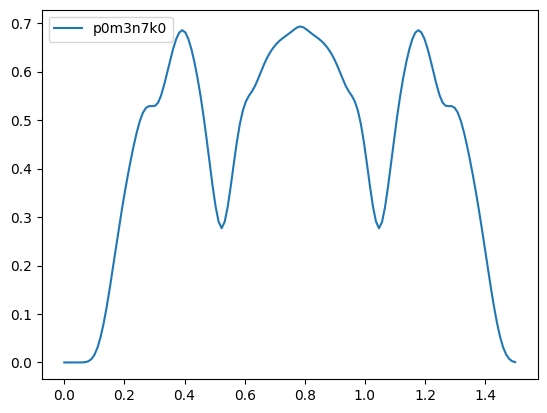

In [10]:
plt.plot(
    tspan,
    entropy_vn_span,
    label=f"p{i_projection}m{m_sites}n{n_bosons}k{''.join(map(str, k_measured))}",
)
plt.legend()

In [11]:
%time entropy_vn_span_ = [entanglement_propagation.rho_b_ent(t, i_projection, k_measured, m_sites, n_bosons) for t in tspan]

CPU times: user 482 ms, sys: 379 ms, total: 862 ms
Wall time: 270 ms


/Users/kephircheek/Projects/Entanglement-propagation-with-bec-qubits/research-emqwuqoc-chain/libs/entanglement_propagation.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  l / eigvals_sum * math.log2(l / eigvals_sum)


/Users/kephircheek/venvs/science/emqwuqoc-dev/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


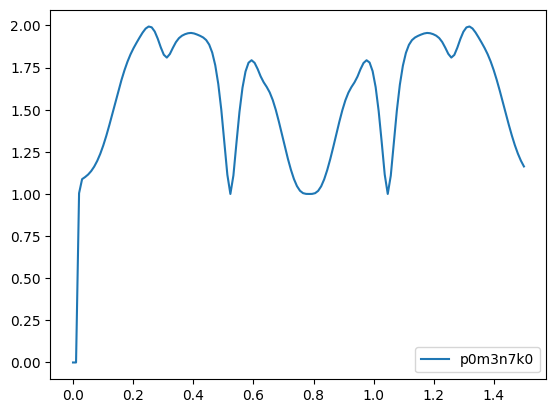

In [12]:
plt.plot(
    tspan,
    entropy_vn_span_,
    label=f"p{i_projection}m{m_sites}n{n_bosons}k{''.join(map(str, k_measured))}",
)
plt.legend()